Sky Kapoor and Chris Compierchio

This program will use the forward and central difference schemes to compare the errors on the derivative of a function using several values of h.

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Define the function f(x)
def f(x):
    return np.e**(-x**2)

In [4]:
#Define the derivative of f(x) using forward difference
def fprime(x, h):
    return (f(x+h)-f(x))/h
#Define the derivative of f(x) using central difference
def fprime2(x, h):
    return (f(x+(h/2))-f(x-(h/2)))/h 

In [5]:
#Define the 2nd derivative of f(x) using forward difference
def fdprime(x,h):
    return (fprime(x+h, h)-fprime(x, h))/(h)
#Define the 2nd derivative of f(x) using central difference
def fdprime2(x,h):
    return (f(x+h)-(2*f(x))+f(x-h))/(h**2)

In [6]:
#Define x
x = 0.5

#define empty h array
h = np.zeros(17)

#define a variable to index through the h array in the loop below
index = 0

#Define the array of h's
for i in range(-16,1):
    h[index] = 10**i
    index += 1

In [7]:
#Make array to store the derivatives of f(x) for the forward difference method
derivatives = np.zeros(17)

#Calculate derivatives for each h
for j in range(0,16):
    derivatives[j] = fprime(x, h[j])

#Make array to store the derivatives of f(x) for the central difference method
derivatives2 = np.zeros(17)

#Calculate derivatives for each h
for j in range(0,16):
    derivatives2[j] = fprime2(x, h[j])


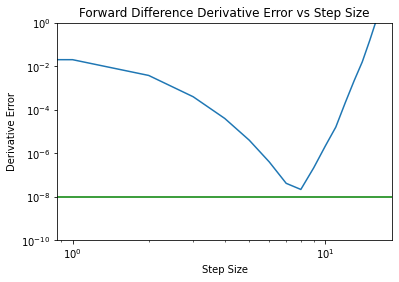

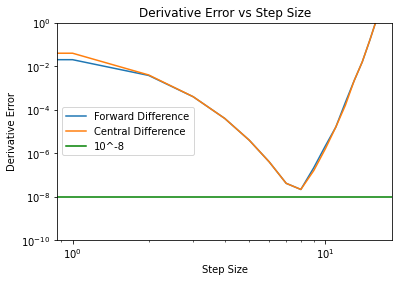

In [21]:
#Make array to store the 2nd derivatives of f(x) for forward difference method
secderivatives = np.zeros(17)

#calculate 2nd derivatives for each h
for m in range(0,16):
    secderivatives[m] = fdprime(x, h[m])
    
#Define constant C
C = 10**(-16)

#Calculate errors using Eq. 5.91 from the textbook
errors = ((2*C*np.abs(f(x)))/h)+.5*h*np.abs(fdprime(x,h))

#Make array to store the 2nd derivatives of f(x) for central difference method
secderivatives2 = np.zeros(17)


#calculate 2nd derivatives for each h
for m in range(0,16):
    secderivatives2[m] = fdprime2(x, h[m])

#Calculate errors using Eq. 5.91 from the textbook
errors2 = ((2*C*np.abs(f(x)))/h)+.5*h*np.abs(fdprime2(x,h))

#plot derivative error vs step size (Q1b)
plt.loglog(np.abs(np.arange(-16,1)), errors, label = "Forward Difference")

plt.axhline(y=10**(-8), color = "green", label = "10^-8")
plt.title("Forward Difference Derivative Error vs Step Size")
plt.xlabel("Step Size")
plt.ylabel("Derivative Error")
plt.ylim(10**(-10), 1)
plt.show()

#Plot results on log scale
plt.loglog(np.abs(np.arange(-16,1)), errors, label = "Forward Difference")
plt.loglog(np.abs(np.arange(-16,1)), errors2, label = "Central Difference")

plt.axhline(y=10**(-8), color = "green", label = "10^-8")
plt.title("Derivative Error vs Step Size")
plt.xlabel("Step Size")
plt.ylabel("Derivative Error")
plt.ylim(10**(-10), 1)
plt.legend(loc="best")
plt.show()

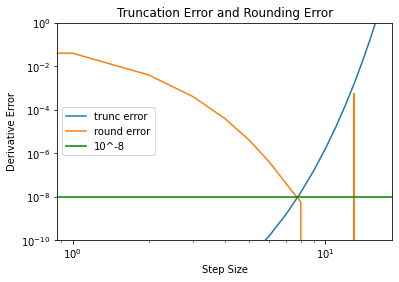

In [22]:
#Evaluate tuncation and rounding errors
trunc_error = (2*C*np.abs(f(x)))/h
round_error = .5*h*np.abs(fdprime2(x,h))

#Plot results to see when they dominate
plt.loglog(np.abs(np.arange(-16,1)), trunc_error, label = "trunc error")
plt.loglog(np.abs(np.arange(-16,1)), round_error, label = "round error")
plt.axhline(y=10**(-8), color = "green", label = "10^-8")

plt.title("Truncation Error and Rounding Error")
plt.xlabel("Step Size")
plt.ylabel("Derivative Error")
plt.ylim(10**(-10), 1)
plt.legend(loc="best")
plt.show()